Accuracy: 96.88%
Precision: 100.00%
Recall: 93.94%
F1 Score: 96.88%
AUC-ROC: 96.97%
AUC-PR: 97.06%
MCC: 93.94%


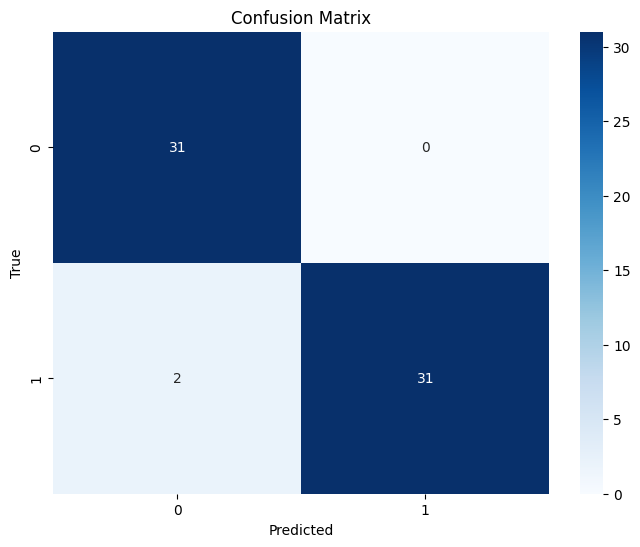

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, average_precision_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your resampled dataset (replace 'final_dataset.csv' with the actual file path)
resampled_df = pd.read_csv('smote.csv')

# Assuming 'diagnosis_result' is the column containing the class diagnosis_result (0 or 1)
X = resampled_df[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']]
y = resampled_df['diagnosis_result']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual base classifiers
random_forest_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create a stack of classifiers using a meta-classifier (Logistic Regression in this case)
stacked_classifier = StackingClassifier(
    estimators=[
        ('random_forest', random_forest_classifier),
        ('knn', knn_classifier),
        ('decision_tree', decision_tree_classifier),
        ('xgb', xgb_classifier)
    ],
    final_estimator=XGBClassifier(random_state=42),  # Meta-classifier
    stack_method='auto',  # Auto mode selects the best method based on the base estimators
    passthrough=True  # Allows the base classifiers to be used directly in prediction
)

# Train the stacked ensemble model
stacked_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacked_classifier.predict(X_test)

# Evaluate the stacked ensemble model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) * 100
pr_auc = average_precision_score(y_test, y_pred) * 100
mcc = matthews_corrcoef(y_test, y_pred) * 100

# Print the evaluation metrics in percentage format
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print(f"AUC-ROC: {roc_auc:.2f}%")
print(f"AUC-PR: {pr_auc:.2f}%")
print(f"MCC: {mcc:.2f}%")

# Plot a graphical representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=stacked_classifier.classes_, yticklabels=stacked_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import pickle
# Save the trained model using pickle
with open('stacked_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(stacked_classifier, model_file)